# Solving the OneMax Problem with Parallel Hill Climbing Algorithm

In this project I code a population-based variant of basic Hill Climbing algorithm to solve a OneMax problem. 

**Parallel Hill Climbing**

This heuristic algorithm combines aspects of both local and population-based search. Each search (hill climbing) is performed locally; however, they are performed in parallel over multiple places in the search space, making it population-based in implementation.
The algorithm is not typically considered a metaheuristic since it doesn't incorporate higher-level strategies like memory mechanisms or adaptive parameters.

**OneMax Problem**

Due to its simplicity, the OneMax problem is a useful baseline to test the performance of algorithms in the AI field of Search and Optimisation. In practice, by finding a solution with ones only, e.g. "1111111111" for a 10-bit-long bitstring, we know that an algorithm has found an optimal solution for the problem.

### Tools

In [1]:
# Libraries

import random
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### The Algorithm

In [2]:
# Custom functions for the algorithm

def generate_random_bitstring(length):
    """Generates a bitstring with random combination of 0s and 1s.
    
    Arguments:
    -----------
    length (int): number of bits in the generated bitstring

    Returns:
    -----------
    bitstring (np.array)    
    """

    return [random.randint(0,1) for _ in range(int(length))]


def bitflip_mutation(bitstring, p):
    """Perform mutation on a bitstring according to probability (p) of the mutation occuring.

    Arguments:
    ----------
    bitstring (np.array): a candidate solution to be mutated
    p (float): probability of mutation

    Returns:
    ----------
    mutated bitstring (np.array)
    """
    
    return [bit if random.random() >= p else 1-bit for bit in bitstring]  


def evaluate_fitness(bitstring):
    """Sum the number of ones in the bitstring.

    Arguments:
    ----------
    bitstring (np.array): a candidate solution for the OneMax problem

    Returns:
    ----------
    fitness score (int)
    """

    return sum(bitstring)


def parallel_hill_climbing(generations, L, population, p):
    """Use Parallel Hill Climbing algorithm to solve OneMax problem.

    Arguments:
    ---------
    generations (int): max number of generations for the search
    L (int): length of a bitstring for the OneMax problem (problem/solution size)
    population (int): number of solutions evolved in parallel
    p (float): probability of mutation

    Returns:
    ---------
    A triplet:
    - the best individual solution found in the search 
    - its fitness score 
    - a history of the best fitness scores in the population of solutions across all generations
    - 
    """

    # Start with the initial population of solutions and fitness values
    initial_population = [generate_random_bitstring(L) for solution in range(int(population))]
    
    # Initiate best solutions, their fitnesses and best_fitness_history 
    best_solutions = initial_population
    initial_fitness_scores = [evaluate_fitness(solution) for solution in best_solutions]
    best_fitness_history = [max(initial_fitness_scores)]

    # For keeping track of convergence speed / processing time
    converged = False
    start_time = time.time()
    
    # Main Search: loop until no improvement is found:
    for generation in range(1, generations + 1):

        # Perform mutation of the best_solutions
        mutated_solutions = [bitflip_mutation(solution, p=p) for solution in best_solutions]

        # Create a combined population of best_solutions and mutated_solutions
        combined_population = np.concatenate([best_solutions, mutated_solutions])
    
        # Obtain fitness scores for the combined_population
        combined_population_scores = [evaluate_fitness(solution) for solution in combined_population]

        # If converged, record time
        if max(combined_population_scores) == L:
            end_time = time.time()
            converged = True
            
        # Select only the best solutions from the combined_population sorted indirectly in an ascending order
        best_indices = np.argsort(combined_population_scores)[-population:]  
        best_solutions = [combined_population[i] for i in best_indices]

        # Update the history of best fitness scores
        best_fitness_history.append(max(combined_population_scores))
    
    # Choose the individual best solution from the final generation
    best_score_idx = int(best_indices[-1:][0])
    best_fitness_score = combined_population_scores[best_score_idx]
    best_individual_solution = combined_population[best_score_idx]

    # Update processing time for non-convergent run of the algorithm
    if not converged:
        end_time = time.time()
   
    return best_individual_solution, best_fitness_score, best_fitness_history, end_time - start_time

In [3]:
# altrenative version of the algorithm employing adaptive mutation

def parallel_hill_climbing_v2(generations, L, population, p_start=0.1, p_end=0.01):
    """Use Parallel Hill Climbing to solve the OneMax problem, running multiple hill climbers 
    that each evolve their own solution. If not specified otherwise, the algorithm employs default 
    adaptive mutation rates that decrease linearly from p=0.1 in the first generation to p=0.01 
    in the final generation, adjusting the exploration-exploitation balance as the search progresses.
    
    Arguments:
    ---------
    generations (int): max number of generations for the search
    L (int): length of a bitstring for the OneMax problem (problem/solution size)
    population (int): number of solutions evolved in parallel
    p_start (float): probability of mutation for the first generation (default 0.1)
    p_end (float): probability of mutation for the last generation (default 0.01)

    Returns:
    ---------
    A triplet:
    - the best individual solution found in the search 
    - its fitness score 
    - a history of the best fitness scores in the population of solutions across all generations
    - 
    """

    # Start with the initial population of solutions and fitness values
    initial_population = [generate_random_bitstring(L) for solution in range(int(population))]
    
    # Initiate best solutions, their fitnesses and best_fitness_history 
    best_solutions = initial_population
    initial_fitness_scores = [evaluate_fitness(solution) for solution in best_solutions]
    best_fitness_history = [max(initial_fitness_scores)]

    # Prepare adaptive mutation schedule
    mutation_schedule = np.linspace(p_start, p_end, generations)
    
    # For keeping track of convergence speed / processing time
    converged = False
    start_time = time.time()
    
    # Main Search: loop until no improvement is found:
    for generation, mutation_rate in zip(range(1, generations + 1), mutation_schedule):

        # Perform mutation of the best_solutions
        mutated_solutions = [bitflip_mutation(solution, p=mutation_rate) for solution in best_solutions]

        # Create a combined population of best_solutions and mutated_solutions
        combined_population = np.concatenate([best_solutions, mutated_solutions])
    
        # Obtain fitness scores for the combined_population
        combined_population_scores = [evaluate_fitness(solution) for solution in combined_population]

        # If converged, record time
        if max(combined_population_scores) == L:
            end_time = time.time()
            converged = True
            
        # Select only the best solutions from the combined_population sorted indirectly in an ascending order
        best_indices = np.argsort(combined_population_scores)[-population:]  
        best_solutions = [combined_population[i] for i in best_indices]

        # Update the history of best fitness scores
        best_fitness_history.append(max(combined_population_scores))
    
    # Choose the individual best solution from the final generation
    best_score_idx = int(best_indices[-1:][0])
    best_fitness_score = combined_population_scores[best_score_idx]
    best_individual_solution = combined_population[best_score_idx]

    # Update processing time for non-convergent run of the algorithm
    if not converged:
        end_time = time.time()
   
    return best_individual_solution, best_fitness_score, best_fitness_history, end_time - start_time

### Testing performance

For initial testing of the Parallel Hill Climbing algorithm I use these parameters:

* Problem size of 50 bits: this should be a good bitstring length to observe algorithm behaviour while keeping computation manageable.
* 100 generations: sufficient for convergence given the problem size.
* Population size 10: provides enough diversity while remaining computationally efficient.
* Mutation rate 0.05: appropriate balance between exploration/exploitation.

Version 1: Constant mutation rate.
Best solution found:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best fitness score: 48
Convergence speed: 0.0271s

Version 2: Adaptive mutation rate.
Best solution found:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best fitness score: 50
Convergence speed: 0.0247s



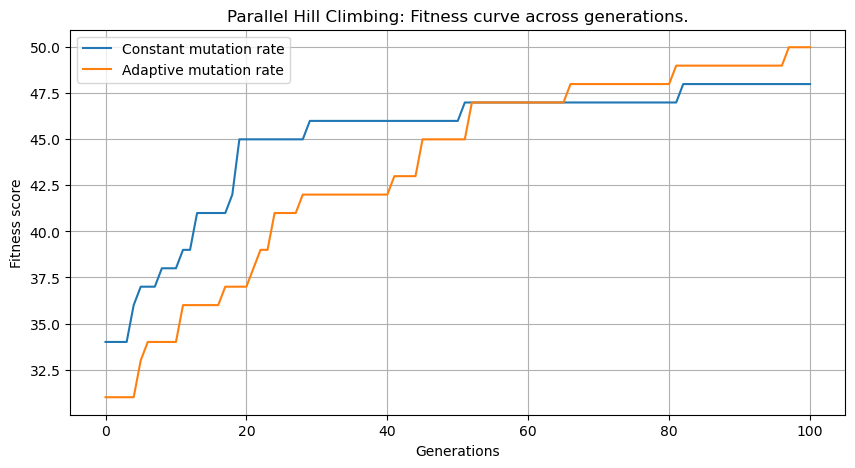

In [4]:
# Choice of parameters
generations = 100
bitstring_length = 50
population_size = 10
mutation_probability = 0.05

# Set seed for reproducibility
random.seed(1234)

# Test-run the algorithm
best_solution, best_fitness, fitness_history, processing_time = parallel_hill_climbing(
    generations=generations, 
    L=bitstring_length, 
    population=population_size, 
    p=mutation_probability
)

print(
    f"Version 1: Constant mutation rate.\n"
    f"Best solution found:\n{best_solution}"
    f"\nBest fitness score: {best_fitness}\n"
    f"Convergence speed: {processing_time:.4f}s\n"
)

# Test-run v2 of the algorithm, with adaptive mutation schedule 

best_solution_v2, best_fitness_v2, fitness_history_v2, processing_time_v2 = parallel_hill_climbing_v2(
    generations=generations, 
    L=bitstring_length, 
    population=population_size, 
)

print(
    f"Version 2: Adaptive mutation rate.\n"
    f"Best solution found:\n{best_solution_v2}"
    f"\nBest fitness score: {best_fitness_v2}\n"
    f"Convergence speed: {processing_time_v2:.4f}s\n"
)

# Plot fitness curve
plt.figure(figsize=(10, 5))
sns.lineplot(x=np.arange(generations + 1), y=fitness_history, label="Constant mutation rate")
sns.lineplot(x=np.arange(generations + 1), y=fitness_history_v2, label="Adaptive mutation rate")
plt.title("Parallel Hill Climbing: Fitness curve across generations.")
plt.xlabel("Generations")
plt.ylabel("Fitness score")
plt.xticks(x=range(0, generations, 10))
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

In the initial test run, the algorithm with constant mutation rate achieves a near optimal score of 48 in about 0.03 second, with the highest progress in fitness evolution noted across the first 20 generations.  

The alternative version of the algorithm with adaptive mutation rate reaches optimal fitness value of 50 in approximately 0.04s. Its fitness curve shows a different search process strategy: the algorithm reaches 45-47.5 threshold in later generations (\~50) than when using constant mutation approach (\~30); however, it continues exploiting the search space for longer. In contrast, the constant mutation rate shows faster initial progress but gets stuck in a local optimum.  

In summary, the adaptive approach starts slower but ultimately achieves better results through sustained improvement.

Next, I test performance of the Parallel Hill Climbing on different bitstring lengths (problem size) by running the algorithm 10 times for each length. Averaged-out results are then plotted.

In [18]:
# Custom function for testing of the Parallel Hill Climber

def test_parallel_hill_climber(bitstring_lengths, alg_version=1, generations=100, population_size=10, runs=10):
    """Test performance of a selected version of Parallel Hill Climbing algorithm on OneMax over repeated runs.
    Explore the algorithm's performance on varying lengths of the bitstring (10, 20, 30,... 90, 100).

    Arguments:
    ---------
    bitstring_lengths (list): a list of bitstring lengths to test for the OneMax problem.
    alg_version (int): version of the algorithm to run in the test (1: constant mutation rate, 
    2: adaptive mutation rate)
    generations (int): max number of generations for the search.
    population_size (int): number of solutions evolved in parallel.
    runs (int): number of repetitions for each test.
    
    Returns:
    ---------
    A tuple:
    - average best fitness scores for each bitstring length
    - average fitness scores history for each bitstring length
    - average computing times 
    """

    # Initiate lists to store statistics
    avg_best_fitness_scores = []
    avg_fitness_history = []
    avg_speeds = []
    
    for length in bitstring_lengths:

        # Initiate helper varabiles for performance data
        best_scores_per_length = []
        fitness_history_sum = np.zeros(generations + 1)
        speed_sum = 0
        
        # Run chose version of the algorithm specified number of times
        for _ in range(runs):
            if alg_version == 1:
                _, test_best_score, test_fitness_history, test_speed = parallel_hill_climbing(
                    generations=generations,
                    L=length, 
                    population=population_size, 
                    p=0.05
                )
            elif alg_version == 2:
                _, test_best_score, test_fitness_history, test_speed = parallel_hill_climbing_v2(
                    generations=generations,
                    L=length, 
                    population=population_size
                )
            else:
                raise ValueError(f"Version {alg_version} is not available.")        
    
            # Capture performance data for each test run
            best_scores_per_length.append(test_best_score)
            fitness_history_sum += np.array(test_fitness_history)
            speed_sum += test_speed

        # Averages for each length
        avg_best_fitness_scores.append(np.mean(best_scores_per_length))
        avg_fitness_history.append(fitness_history_sum / runs)
        avg_speeds.append(speed_sum / runs)

    return avg_best_fitness_scores, avg_fitness_history, avg_speeds


Average best fitness score for 100 bits:
V1: 87.1
V2: 89.8



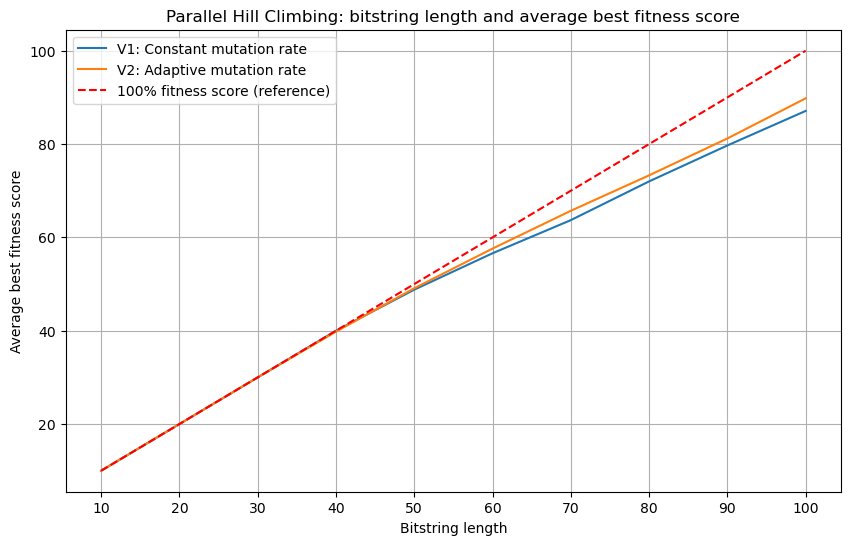

In [29]:
# Set seed for reproducibility
random.seed(1234)

# Bitstring lengths to explore
bitstring_lengths = np.linspace(10, 100, 10)

# Test-run the algorithm 10 times for each bitstring length
avg_best_fitness_scores, avg_fitness_scores_history, avg_speed = test_parallel_hill_climber(
    bitstring_lengths
)

# Test-run the v2 of the algorithm (with adaptive mutation) 10 times for each bitstring length
avg_best_fitness_scores2, avg_fitness_scores_history2, avg_speed2 = test_parallel_hill_climber(
    bitstring_lengths, 
    alg_version=2
)

# Print stats
print(
    f"\nAverage best fitness score for 100 bits:"
    f"\nV1: {np.mean(avg_best_fitness_scores[-1:])}"
    f"\nV2: {np.mean(avg_best_fitness_scores2[-1:])}\n"
)

# Plot data
plt.figure(figsize=(10, 6))
sns.lineplot(x=bitstring_lengths, y=avg_best_fitness_scores, label=f"V1: Constant mutation rate")
sns.lineplot(x=bitstring_lengths, y=avg_best_fitness_scores2, label=f"V2: Adaptive mutation rate")
sns.lineplot(x=bitstring_lengths, y=bitstring_lengths, label="100% fitness score (reference)",
             linestyle='--', color='red')
plt.title("Parallel Hill Climbing: bitstring length and average best fitness score")
plt.xlabel("Bitstring length")
plt.ylabel("Average best fitness score")
plt.xticks(bitstring_lengths)
plt.legend()
plt.grid(True)
plt.show()

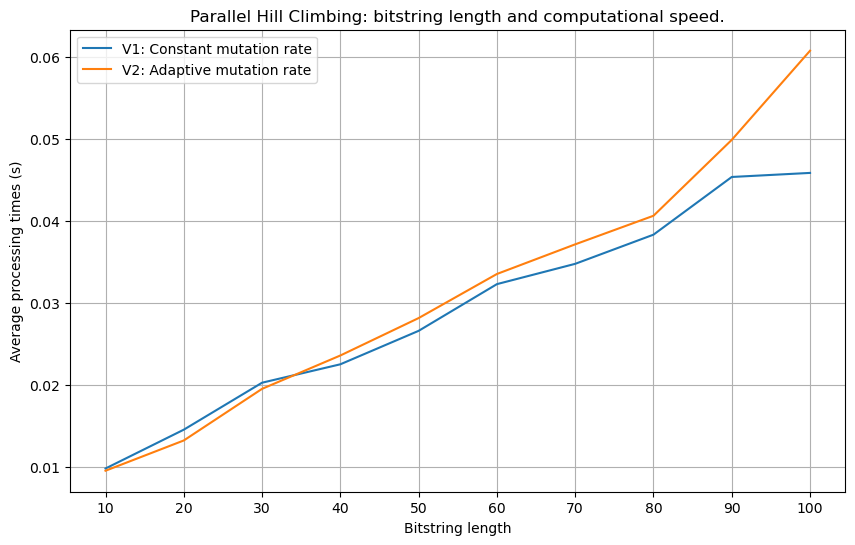

In [30]:
# Plot processing times
plt.figure(figsize=(10, 6))
sns.lineplot(x=bitstring_lengths, y=avg_speed, label=f"V1: Constant mutation rate")
sns.lineplot(x=bitstring_lengths, y=avg_speed2, label=f"V2: Adaptive mutation rate")
plt.title("Parallel Hill Climbing: bitstring length and computational speed.")
plt.xlabel("Bitstring length")
plt.ylabel("Average processing times (s)")
plt.xticks(bitstring_lengths)
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

When run with a population of 10 solutions and probability of mutation set to 0.05, the Parallel Hill Climbing algorithm easily finds optimal solutions for smaller problem sizes (10 to 40-bit-long bitstring). From around that point, the algorithm's performance gradually degrades, on average scoring approximately 85-90 for the bitstring with 100 bits. 

In regards of computational efficiency, there is a strong positive relationship between longer bitstring length and processing time required, with adaptive mutation rate being less efficient in that respect, especially for the largest problem sizes; however, the difference is small. Please note, neither of the approaches enables reaching convergence for problem sizes larger than approx. 40-bit-long bitstrings in explored 100 generations.

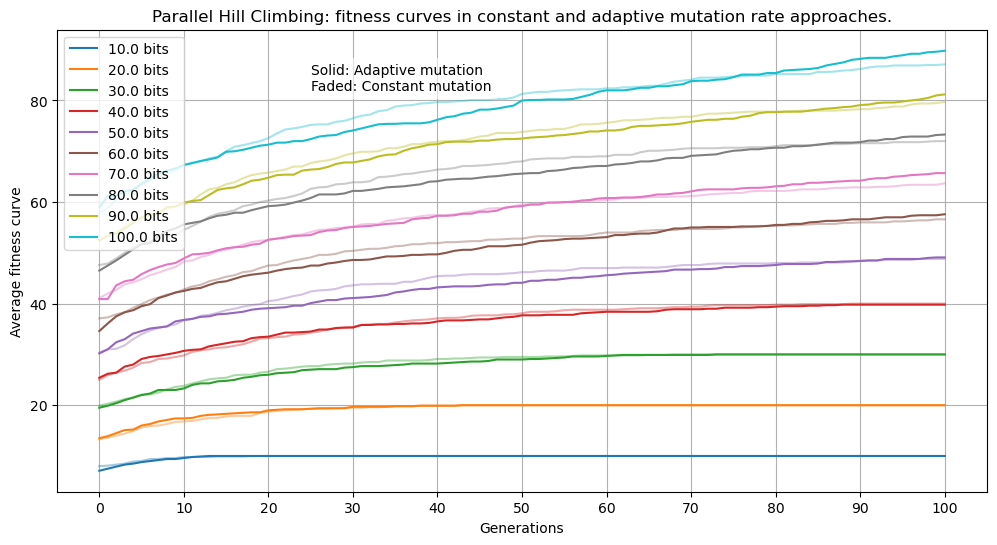

In [56]:
plt.figure(figsize=(12, 6))

# Adaptive mutation approach
for length, fitness_v2 in zip(bitstring_lengths, avg_fitness_scores_history2):
    sns.lineplot(x=np.arange(generations + 1), y=fitness_v2, label=f"{length} bits")

# Constant mutation rate approach
for length, fitness_v1 in zip(bitstring_lengths, avg_fitness_scores_history):
    sns.lineplot(x=np.arange(generations + 1), y=fitness_v1, alpha=0.4, label='_nolegend_')

# Annotation near the 100-bit lines
plt.annotate(
    'Solid: Adaptive mutation\nFaded: Constant mutation', 
    xy=(20, 77),  # Position to point to
    xytext=(25, 82),  # Text position
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.6),  # White background
)

plt.title("Parallel Hill Climbing: fitness curves in constant and adaptive mutation rate approaches.")
plt.xlabel("Generations")
plt.ylabel("Average fitness curve")
plt.xticks(np.arange(0, generations + 1, 10))
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

When looking on the averaged out fitness curves for all bitstring lengths, we can observe a clear pattern of larger number of generations required to converge the longer the bitstring length. 

The constant mutation approach (faded lines) shows slightly more noisy/jagged progression, whilst the adaptive approach leads to smoother convergence curves. For longer bitstrings (80-100 bits), the adaptive approach maintains better progress even in later generations, thanks to a mutation rate nearing 0.01 which promotes exploitation of the search space. Conversely, the constant approach tends to plateau earlier, especially visible in medium-length bitstrings (40-60 bits). The adaptive approach achieves marginally better final fitness values across most bitstring lengths.

I run the algorithm on 1000 generations to explore if this makes convergence possible in larger problem sizes. I also capture convergence speed (where applicable).

In [57]:
# Choice of parameters
more_generations = 1000
longer_bitstrings = [50,60,70,80,90,100]

# test-run the algorithm
avg_best_fitness_scores, avg_fitness_scores_history, avg_speed = test_parallel_hill_climber(
    bitstring_lengths=longer_bitstrings,
    generations = more_generations    
)

# Test-run the v2 of the algorithm (with adaptive mutation) 
avg_best_fitness_scores2, avg_fitness_scores_history2, avg_speed2 = test_parallel_hill_climber(
    bitstring_lengths=longer_bitstrings,
    generations = more_generations,
    alg_version=2
)

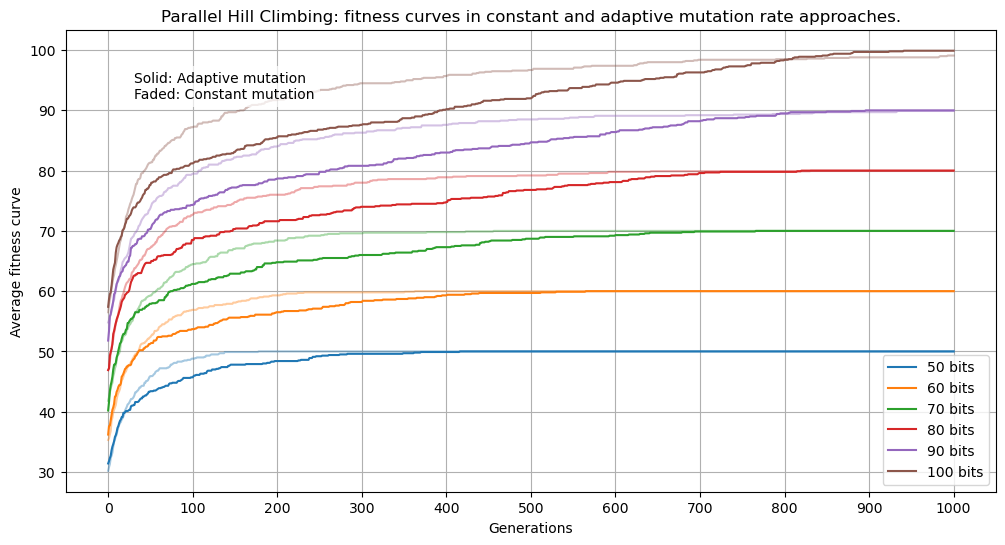

In [72]:
plt.figure(figsize=(12, 6))

# Create a color palette for all lines
colors = sns.color_palette(n_colors=len(longer_bitstrings))

# Adaptive mutation approach
for length, fitness_v2, color in zip(longer_bitstrings, avg_fitness_scores_history2, colors):
    sns.lineplot(x=np.arange(more_generations + 1), y=fitness_v2, label=f"{length} bits", color=color)

# Constant mutation rate approach
for length, fitness_v1, color in zip(longer_bitstrings, avg_fitness_scores_history, colors):
    sns.lineplot(x=np.arange(more_generations + 1), y=fitness_v1, alpha=0.4, label='_nolegend_', color=color)

# Annotation near the 100-bit lines
plt.annotate(
    'Solid: Adaptive mutation\nFaded: Constant mutation', 
    xy=(25, 97),  # Position to point to
    xytext=(30, 92),  # Text position
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7), 
)

plt.title("Parallel Hill Climbing: fitness curves in constant and adaptive mutation rate approaches.")
plt.xlabel("Generations")
plt.ylabel("Average fitness curve")
plt.xticks(np.arange(0, more_generations + 1, 100))
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

The results clearly demonstrate that the adaptive mutation rate strategy is superior, particularly for larger problem sizes. The approach of starting with high exploration (0.1) and gradually transitioning to exploitation (0.01) provides a better balance between exploration and exploitation compared to the constant mutation rate of 0.05.

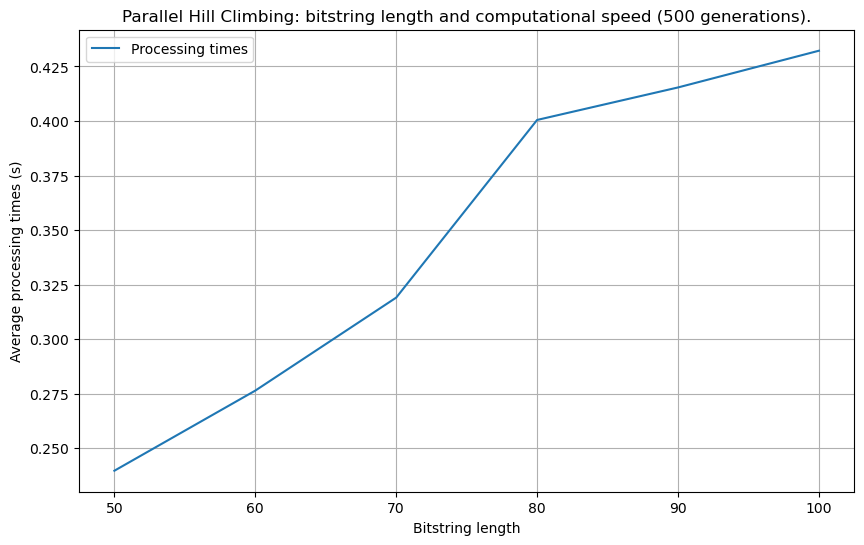

In [9]:
# Plot processing times
plt.figure(figsize=(10, 6))
sns.lineplot(x=longer_bitstrings, y=avg_speed, label=f"Processing times")
plt.title("Parallel Hill Climbing: bitstring length and computational speed (500 generations).")
plt.xlabel("Bitstring length")
plt.ylabel("Average processing times (s)")
plt.xticks(longer_bitstrings)
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

On average, it takes between 0.24s (50 bits) and 0.34s (80 bits) for the algorithm to converge in OneMax problem. However, despite of running the search for 1000 generations, Parallel Hill Climber is unable to converge for the 90 and 100 bit problems. 

The performance decline for 90+ bit problems indicates the algorithm's scalability limitations. While fast convergence for 50-80 bits is good (0.24-0.34s), failure to converge on larger problems suggests Parallel Hill Climbing may get trapped in local optima. 

In the second test, I explore the effect of different population sizes on the algorithm's performance.

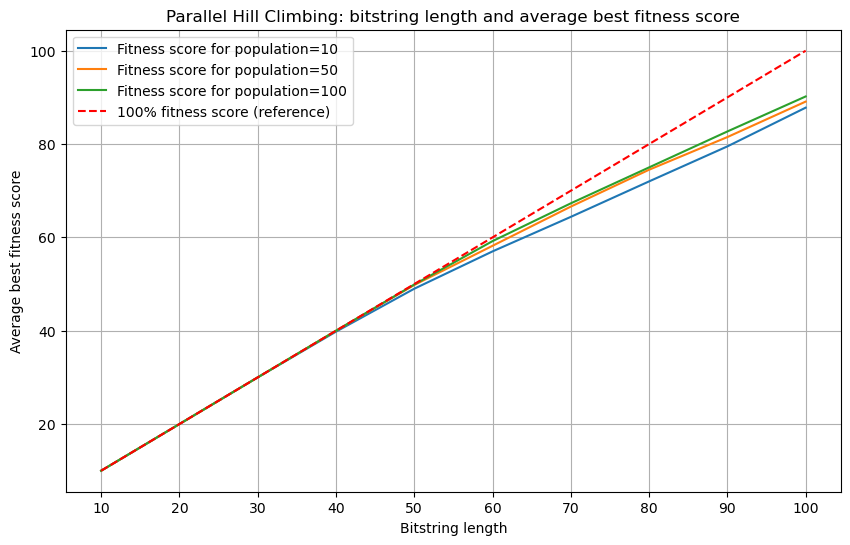

In [10]:
# Parameters choice
population_sizes = [10, 50, 100]

# Test-run the algorithm and plot average scores for each population size
plt.figure(figsize=(10, 6))

for size in population_sizes:
    avg_best_fitness_scores, _ , _ = test_parallel_hill_climber(
        population_size=size,
        bitstring_lengths=bitstring_lengths,
        generations=100        
    )
    sns.lineplot(x=np.linspace(10, 100, 10), y=avg_best_fitness_scores, label=f"Fitness score for population={size}")

sns.lineplot(x=np.linspace(10, 100, 10), y=np.linspace(10, 100, 10), label="100% fitness score (reference)",
             linestyle='--', color='red')
plt.title("Parallel Hill Climbing: bitstring length and average best fitness score")
plt.xlabel("Bitstring length")
plt.ylabel("Average best fitness score")
plt.xticks(np.linspace(10, 100, 10))
plt.legend()
plt.grid(True)
plt.show()

**Conclusions:**

Population size has only a limited influence over performance of the algorithm in the explored range of problem sizes. The divergence from optimal fitness (red dashed line) becomes pronounced after 40 bits, suggesting inherent limitations of Parallel Hill Climbing regardless of population size. Other, more efficient algorithms would be appropriate, e.g., Genetic Algorithms. 

### Future Improvements

It is possible that exploring an adaptive schedule for mutation rate could improve average fitness score, e.g., dependent on diversity of population or time the algorithm runs.